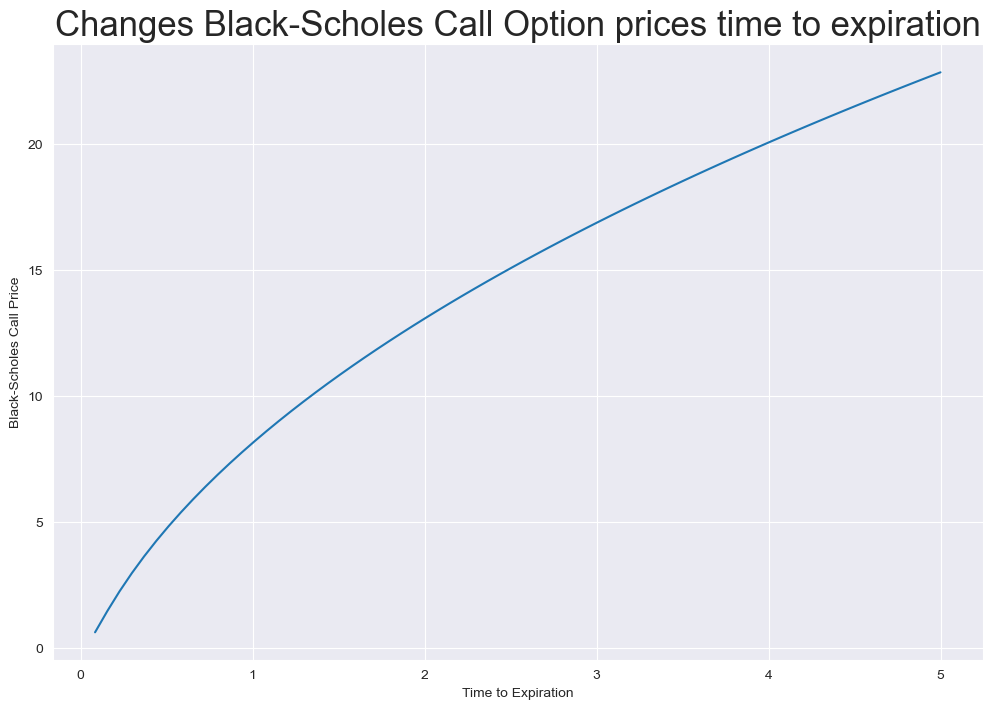

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')
def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)
def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

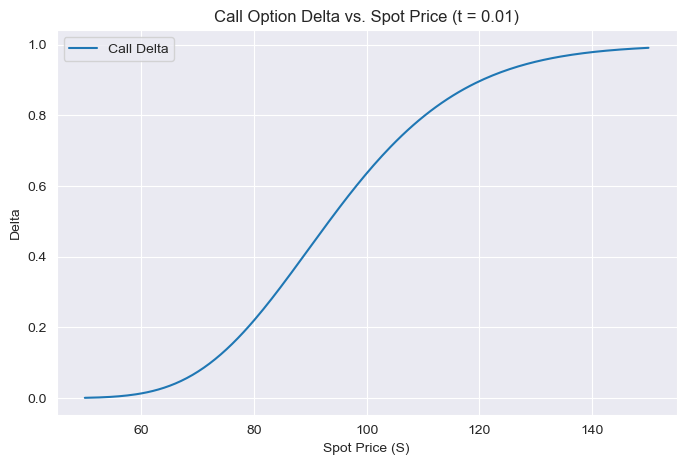

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

K = 100       # Strike price
r = 0.05      # Risk-free rate
sigma = 0.2   # Volatility
T = 1         # Time to maturity
t = 0.01      # A small fixed time (near maturity)

# Delta of call option
def call_delta(S, t):
    tau = T - t
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    return norm.cdf(d1)
# Generate spot price values
S_vals = np.linspace(50, 150, 200)
delta_vals = [call_delta(S, t) for S in S_vals]
# Plot Delta vs Spot Price
plt.figure(figsize=(8,5))
plt.plot(S_vals, delta_vals, label='Call Delta')
plt.xlabel('Spot Price (S)')
plt.ylabel('Delta')
plt.title(f'Call Option Delta vs. Spot Price (t = {t})')
plt.grid(True)
plt.legend()
plt.show()


/var/folders/xm/6mxd0lhj0jnf63lx6zv6zx_m0000gn/T/ipykernel_1724/2016233568.py:12: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))


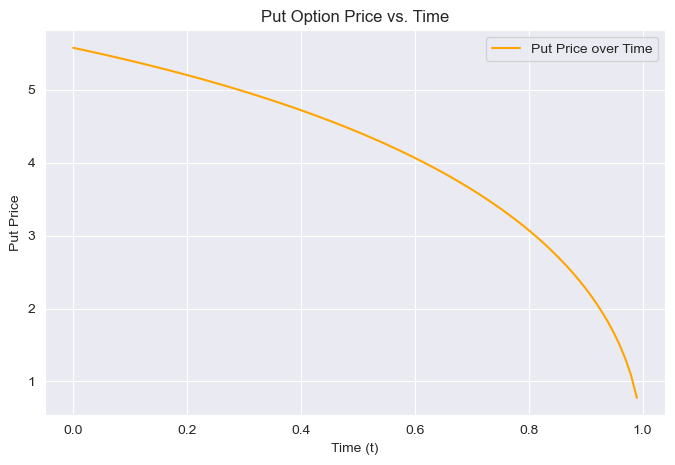

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# Parameters
K = 100       # Strike price
r = 0.05      # Risk-free rate
sigma = 0.2   # Volatility
T = 1         # Time to maturity
# Put option Black-Scholes price
def bs_put(S, t):
    tau = T - t
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    return K * np.exp(-r * tau) * norm.cdf(-d2) - S * norm.cdf(-d1)
# Delta of the put option
def put_delta(S, t):
    tau = T - t
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    return norm.cdf(d1) - 1  # Put Delta formula
# 1. Plot Put Option Price vs Time
S0 = 100  # Fixed spot price
t_vals = np.linspace(0.001, T, 100)
put_prices = [bs_put(S0, t) for t in t_vals]
plt.figure(figsize=(8,5))
plt.plot(t_vals, put_prices, label='Put Price over Time', color='orange')
plt.xlabel('Time (t)')
plt.ylabel('Put Price')
plt.title('Put Option Price vs. Time')
plt.grid(True)
plt.legend()
plt.show()

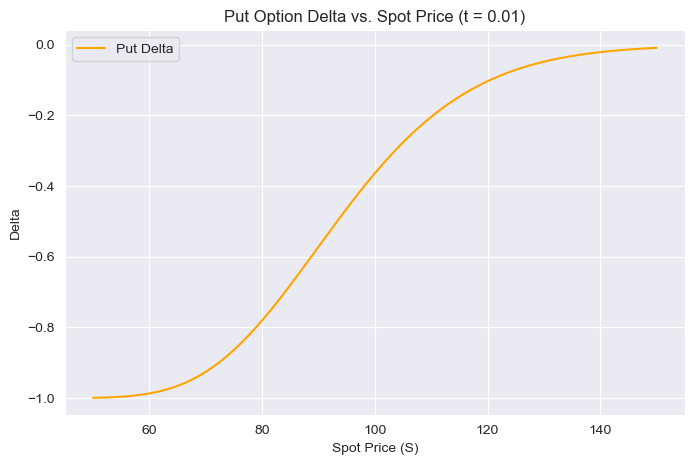

In [8]:
# 2. Plot Put Delta vs Spot Price
t_fixed = 0.01
S_vals = np.linspace(50, 150, 200)
put_deltas = [put_delta(S, t_fixed) for S in S_vals]
plt.figure(figsize=(8,5))
plt.plot(S_vals, put_deltas, label='Put Delta', color='orange')
plt.xlabel('Spot Price (S)')
plt.ylabel('Delta')
plt.title(f'Put Option Delta vs. Spot Price (t = {t_fixed})')
plt.grid(True)
plt.legend()
plt.show()